In [1]:
import matplotlib.pyplot as plt
import Utils.data_utils as data
import pickle
import numpy as np

In [2]:
def scale(do=False):
    if do:        
        min_ = min(y[0]+y[1])
        max_ = max(y[0]+y[1])
        
        ylim = [min_-0.01, min_+gph_high+0.01]
        top_cap = 1-ylim[1]
        if top_cap < 0:
            ylim = ylim[0]+top_cap, ylim[1]+top_cap
            
        bot_margin = min_-ylim[0]
        top_margin = ylim[1]-max_
        margin = (bot_margin+top_margin)*0.5
        
        ylim = min_ - margin, max_ + margin
        
        plt.yticks(np.arange(0, 1, gph_step))
        plt.ylim(ylim)
        
def get_high(points):
    gph_high = 0
    for p in points:
        t_p = p[0]+p[1]
        high = max(t_p)-min(t_p)
        if high > gph_high:
            gph_high = high
    return gph_high

def load_processed(t_save_path, s_save_path, split=False):
    """
    t Order: Xtrain, ytrain, Xdev, ydeb, Xtest, ytest
    s Order: X_train, y_train, X_unl, y_unl
    """
    with open(t_save_path,'rb') as f: t = pickle.load(f)
    if split:
        with open(s_save_path,'rb') as f: s = pickle.load(f)
        return t, s
    return t

In [3]:
gph_step = 0.025

## Macro/ Micro F1

In [4]:
x = [1, 2, 5, 10, 20]
x1 = ['1', '2', '5', '10', '20']

y1 = [0.4834, 0.5223, 0.5775, 0.6018, 0.6280]
y2 = [0.4674, 0.5049, 0.5579, 0.5856, 0.6244]

y3 = [0.6735, 0.6919, 0.7501, 0.7613, 0.7801]
y4 = [0.6663, 0.6918, 0.7432, 0.7645, 0.8013]

gph_high = get_high([[y1,y2],[y3,y4]])

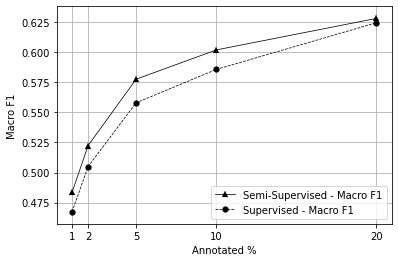

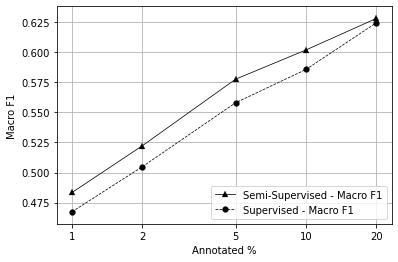

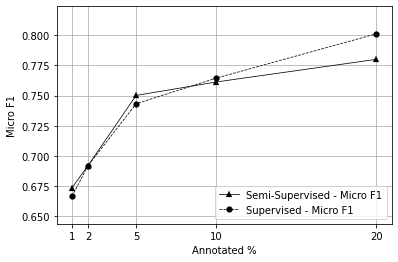

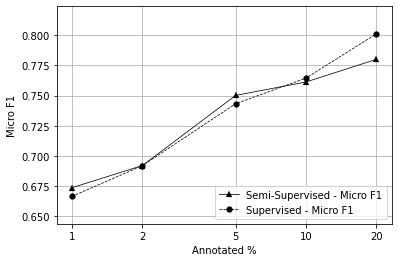

In [5]:
for n,y in enumerate([[y1,y2],[y3,y4]]):
    
    num_plots = 2
    for i in range(num_plots):
        if i:
            plt.xscale('log', basex=2)
        scale(True)
        plt.xticks(x, labels=x1)
        
        label0 = "Semi-Supervised - Macro F1"
        label1 = "Supervised - Macro F1"
        ylabel = 'Macro F1'
        
        if n:
            label0 = label0[:-7]+'i'+label0[-6:]
            label1 = label1[:-7]+'i'+label1[-6:]
            ylabel = ylabel[:-7]+'i'+ylabel[-6:]
        
        plt.plot(x, y[0], label = label0, color='black', marker='^', mew=0.2, linestyle='-', linewidth=0.75)
        plt.plot(x, y[1], label = label1, color='black', marker='o', mew=0.2, linestyle='--', linewidth=0.75)
        plt.xlabel('Annotated %')
        plt.ylabel(ylabel)
        plt.legend(loc='lower right')
        plt.grid(True)
        #plt.savefig("./Graphs_Folder/Result_"+str(n)+"_"+str(i)+"_plot.eps", bbox_inches='tight')
        plt.show()
    

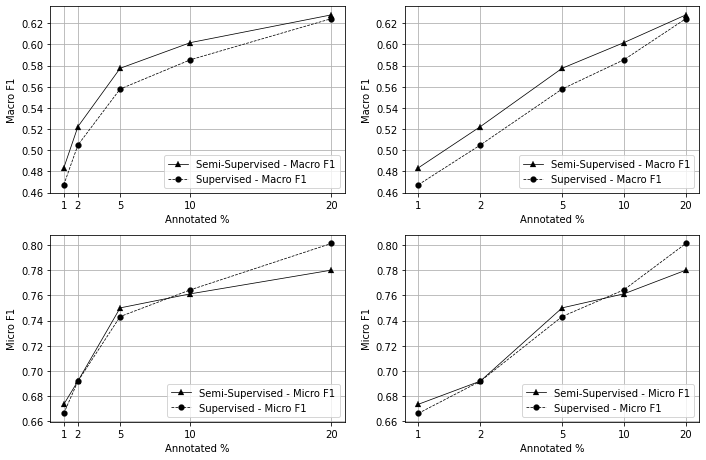

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10,6.5))
axs[0,1].set_xscale('log', basex=2)
axs[1,1].set_xscale('log', basex=2)

for ax in axs[0]:
    ax.set_xticks(x)
    ax.set_xticklabels(x1)
    ax.plot(x, y1, label = "Semi-Supervised - Macro F1", color='black', marker='^', mew=0.2, linestyle='-', linewidth=0.75)
    ax.plot(x, y2, label = "Supervised - Macro F1", color='black', marker='o', mew=0.2, linestyle='--', linewidth=0.75)
    ax.set_xlabel('Annotated %')
    ax.set_ylabel('Macro F1')
    ax.legend(loc='lower right')
    ax.grid(True)
    
for ax in axs[1]:
    ax.set_xticks(x)
    ax.set_xticklabels(x1)
    ax.plot(x, y3, label = "Semi-Supervised - Micro F1", color='black', marker='^', mew=0.2, linestyle='-', linewidth=0.75)
    ax.plot(x, y4, label = "Supervised - Micro F1", color='black', marker='o', mew=0.2, linestyle='--', linewidth=0.75)
    ax.set_xlabel('Annotated %')
    ax.set_ylabel('Micro F1')
    ax.legend(loc='lower right')
    ax.grid(True)

fig.tight_layout()
# function to show the plot
plt.show()

## F1 per Class

In [ ]:
x = [1, 2, 5, 10, 20]
x1 = ['1', '2', '5', '10', '20']

y1_ = [0.483, 0.5561, 0.6396, 0.6783, 0.7309]
y1 = [0.5029, 0.5502, 0.6505, 0.6871, 0.7138]

y2_ = [0.1292, 0.1512, 0.188, 0.2164, 0.257]
y2 = [0.1464, 0.1982, 0.2275, 0.252, 0.2959]

y3_ = [0.79, 0.8075, 0.846, 0.8621, 0.8854]
y3 = [0.8009, 0.8183, 0.8545, 0.8662, 0.8742]

gph_high = get_high([[y1,y1_],[y2,y2_],[y3,y3_]])

In [ ]:
for n,y in enumerate([[y1,y1_],[y2,y2_],[y3,y3_]]):
    
    scale(True)
    plt.xticks(x, labels=x1)
    label0 = "Semi-Supervised"
    label1 = "Supervised"
    ylabel = "F1"

    plt.plot(x, y[0], label = label0, color='black', marker='^', mew=0.2, linestyle='-', linewidth=0.75)
    plt.plot(x, y[1], label = label1, color='black', marker='o', mew=0.2, linestyle='--', linewidth=0.75)
    plt.xlabel('Annotated %')
    plt.ylabel(ylabel)
    plt.legend(loc='lower right')
    plt.grid(True)
    #plt.savefig("./Graphs_Folder/Result_label"+str(n)+"_plot_linear.eps", bbox_inches='tight')
    plt.show()

In [ ]:
for n,y in enumerate([[y1,y1_],[y2,y2_],[y3,y3_]]):
    
    #scale(True)
    plt.xscale('log', basex=2)
    plt.xticks(x, labels=x1)
        
    label0 = "Semi-Supervised"
    label1 = "Supervised"
    ylabel = "F1"

    plt.plot(x, y[0], label = label0, color='black', marker='^', mew=0.2, linestyle='-', linewidth=0.75)
    plt.plot(x, y[1], label = label1, color='black', marker='o', mew=0.2, linestyle='--', linewidth=0.75)
    plt.xlabel('Annotated %')
    plt.ylabel(ylabel)
    plt.legend(loc='lower right')
    plt.grid(True)
    #plt.savefig("./Graphs_Folder/Result_label"+str(n)+"_plot_logarithm.eps", bbox_inches='tight')
    plt.show()

In [ ]:
# fig, axs = plt.subplots(1, 3, figsize=(16,4))
# for i,ax in enumerate(axs):
#     ax.set_xticks(x)
#     ax.set_xticklabels(x1)
#     ax.plot(x, y[i][0], label = "Semi-Supervised", color='black', marker='^', mew=0.2, linestyle='-', linewidth=0.75)
#     ax.plot(x, y[i][1], label = "Supervised", color='black', marker='o', mew=0.2, linestyle='--', linewidth=0.75)
#     ax.set_xlabel('Annotated %')
#     ax.set_ylabel('F1')
#     ax.legend(loc='lower right')
#     ax.grid(True)
    
# fig.tight_layout()
# # function to show the plot
# plt.show()

## BARS GRAPHICS

In [47]:
y_label2 = [106866, 35440]
y_label1 = [14356, 4829]
y_label0 = [40075, 13497]
y_t = [[y_label2[0],y_label1[0],y_label0[0]], [y_label2[1],y_label1[1],y_label0[1]]]
x = np.array([2,1,0])
ylabels = np.array(["Positive\n(Class 2)","Neutral\n(Class 1)","Negative\n(Class 0)"])
colors = ['orange', 'lightsteelblue']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

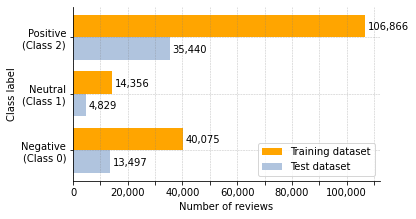

In [51]:
w = 0.8
dimw = w/len(y_t)

fig, ax = plt.subplots(figsize=(5.5,3.2))

for i, y in enumerate(y_t):
    ax.barh(x+(1-i)*dimw, y, height=dimw, color=colors[i])    
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# ax.xaxis.set_tick_params(pad = 5)
# ax.yaxis.set_tick_params(pad = 10)

xlabels=[f'{i:,}' if i*1e-4%2==0 else "" for i in range(0,120000,10000)][:-1]
ax.set_xticks(range(0,120000,10000))
ax.set_xticklabels(xlabels)

ax.set_yticks(x + dimw / 2)
#ax.set_yticklabels(map(str, x))
ax.set_yticklabels(ylabels)

ax.grid(b = True, color ='grey',
        linestyle ='--', linewidth = 0.5,
        alpha = 0.5)

ax.legend(labels=['Training dataset','Test dataset'],loc='lower right')
ax.set_xlabel('Number of reviews')
ax.set_ylabel('Class label')

# ax.invert_yaxis()

for index, i in enumerate(ax.patches):
    plt.text((i.get_width()+1000), (i.get_y()+0.13),
             str(f'{i.get_width():,}'))
    
plt.savefig("./Graphs_Folder/Dataset_Classes_Distribution_final.eps", bbox_inches='tight')
plt.show()

## Probability density function

In [ ]:
import bert

In [ ]:
path_train = 'dataset/Raw/3c_Train.csv'
path_test = 'dataset/Raw/3c_Test.csv'
path_bert_model = './BERT-models/BERT-Mini'

dataset = data.Dataset()
dataset.load_csv(path_train, path_test, label_name='blabel', separator='\t')

In [ ]:
def createTokenizer(model_path):
    """This function aims to create a tokenizer specific to the format of BERT models. 
    BERT models contain different files, one of which is vocab.txt
    - vocab: vocab.txt path"""
    return bert.bert_tokenization.FullTokenizer(model_path+'/vocab.txt', do_lower_case=True)
def format_text(text, tokenizer):
    return tokenizer.tokenize(text)

In [ ]:
tokenizer = createTokenizer(path_bert_model)
dataset.get_train().review = dataset.get_train().review.replace('"','', regex=True)
Xtrain = np.asarray([format_text(text, tokenizer) for text in dataset.get_train().review])
dataset.get_train().review = Xtrain

dataset.get_test().review = dataset.get_test().review.replace('"','', regex=True)
Xtest = np.asarray([format_text(text, tokenizer) for text in dataset.get_test().review])
dataset.get_test().review = Xtest

In [ ]:
def text_len_distribution(dataset, col_name, len_list=None):
        if not len_list:
            len_list = [len(x) for df in dataset.get_all() for x in df[col_name]]
        fig, axs = plt.subplots(1,2,figsize=(12,3.2))

        for ax in axs:
            for s in ['top', 'right']:
                ax.spines[s].set_visible(False)
                ax.grid(b = True, color ='grey',linestyle ='--', linewidth = 0.5,alpha = 0.5)
        data = np.asarray(len_list)
        
        axs[0].set_ylabel('Probability Density')
        axs[0].set_xlabel('Length')
        
        axs[1].set_ylabel('Probability')
        axs[1].set_xlabel('Length')

        values, base = np.histogram(data, bins=(np.max(data)-np.min(data)), density=True)
        
        axs[0].set_title("Probability density function")
        axs[0].plot(base[:-1], values, c='dimgrey', linewidth=2)
        axs[0].set_xticks(range(0, 2500, 250))

        cumulative = np.cumsum(values)
        axs[1].set_title("Cumulative distribution function")
        axs[1].plot(base[:-1], cumulative, c='dimgrey', linewidth=2)
        axs[1].set_xticks(range(0, 2500, 250))
        
        #plt.savefig("./Graphs_Folder/Dataset_Density_Function.eps", bbox_inches='tight')
        plt.show()

In [ ]:
text_len_distribution(dataset, 'review')

## Noise random uniform plot

In [ ]:
x = np.random.uniform(size=200)

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))
count, bins, ignored = ax.hist(x, 15, density=True, color='lightsteelblue')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
ax.grid(b = True, color ='grey',linestyle ='--', linewidth = 0.5,alpha = 0.5)

ax.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.savefig("./Graphs_Folder/random_uniform.svg", bbox_inches='tight')
plt.show()